## The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

###Origin:
The origin of the boston housing data is Natural.
###Usage:
This dataset may be used for Assessment.
###Number of Cases:
The dataset contains a total of 506 cases.
###Order:
The order of the cases is mysterious.
###Variables:
There are 14 attributes in each case of the dataset. They are:

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per \$10,000
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
# *   MEDV - Median value of owner-occupied homes in $1000's

---


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Load the Dataset and Samples
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/MyDrive/ML/boston/housing.csv', header=None, delimiter=r'\s+', names=column_names )
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# Dimention of the dataset
data.shape

(506, 14)

## Data Analysis

### Data Preplocessing

In [4]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
# Getting some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Checking missing values
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Data Visualization

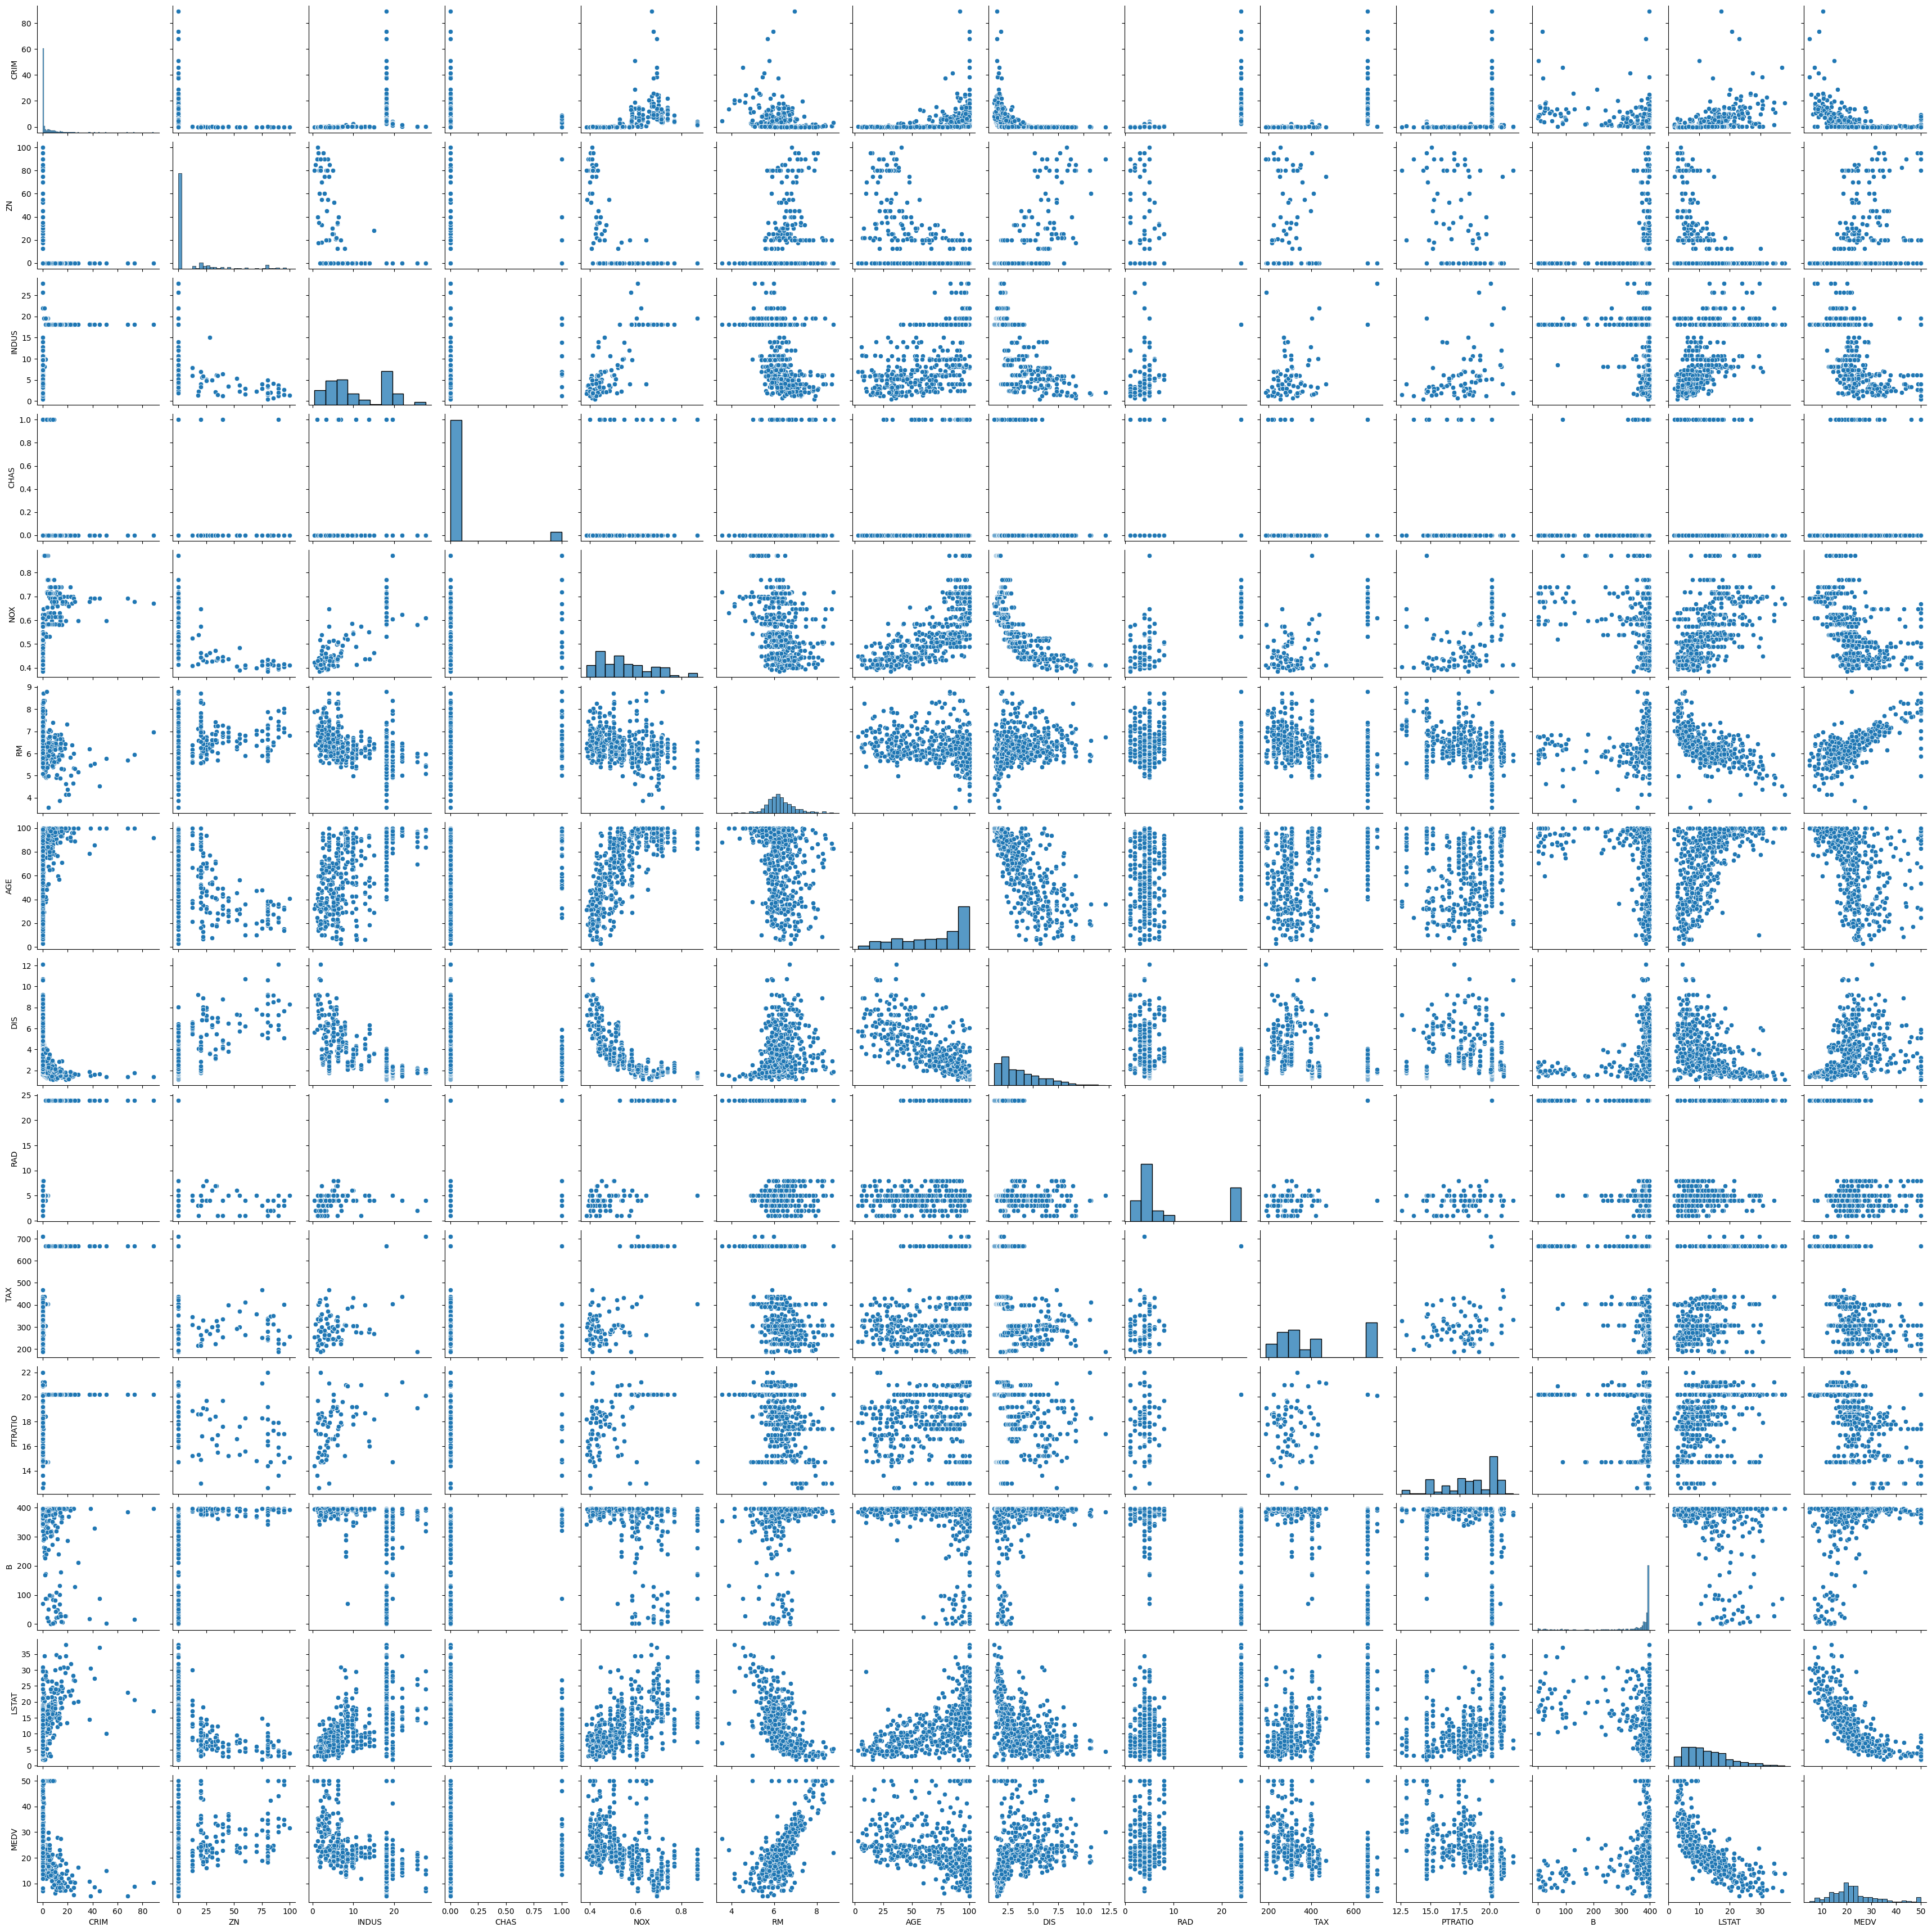

In [7]:
sns.pairplot(data)
plt.show()

From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

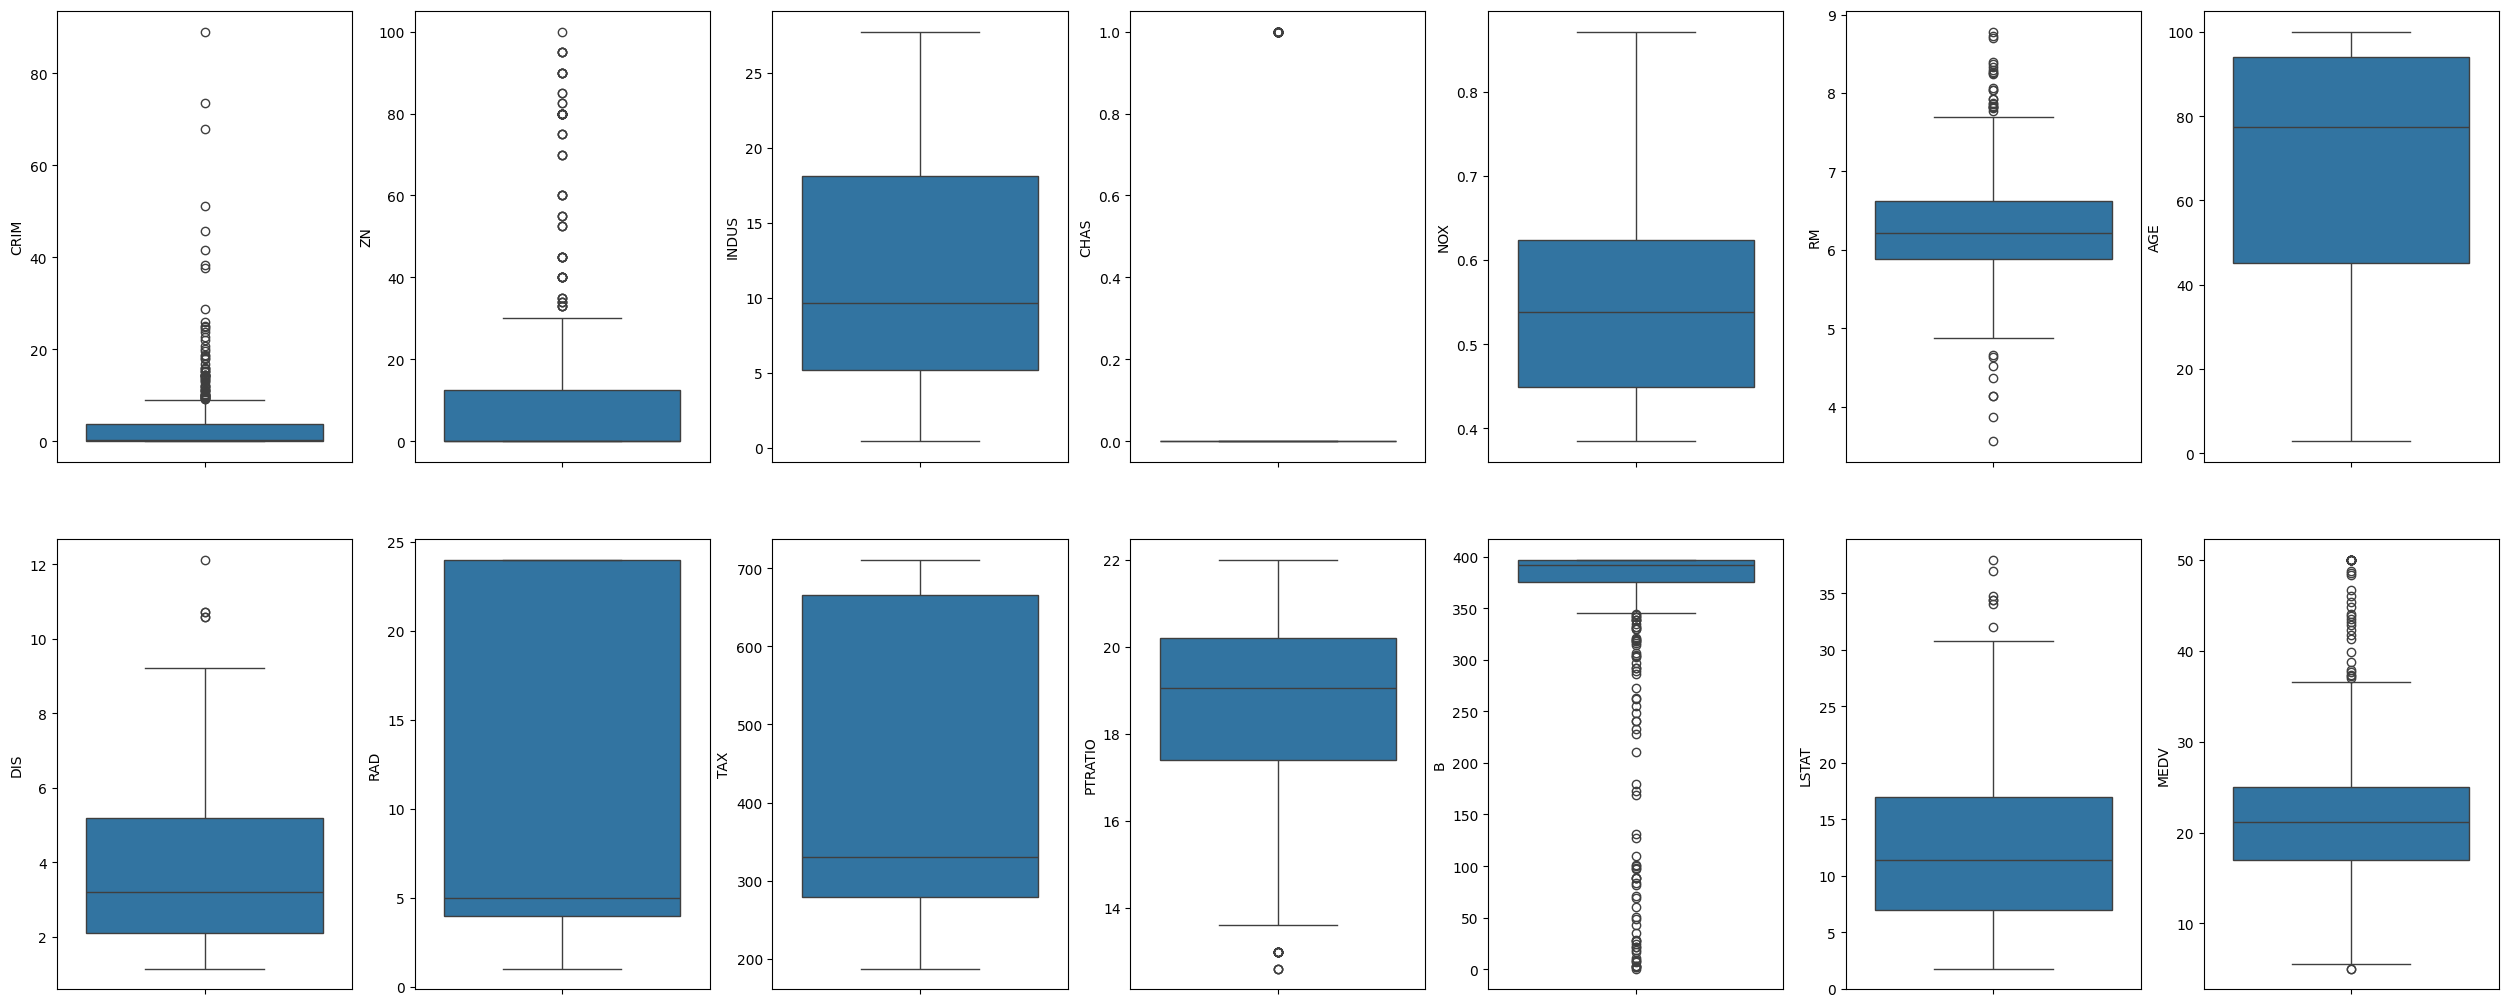

In [8]:
from typing_extensions import NoReturn
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(25, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad= 5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

## Handeling the Outliers

In [9]:
for k,v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 *iqr)]
  perc = np.shape(v_col)[0] *100.0 / np.shape(data)[0]
  print('column %s outliers = %.2f%%' % (k,perc))

column CRIM outliers = 13.04%
column ZN outliers = 13.44%
column INDUS outliers = 0.00%
column CHAS outliers = 100.00%
column NOX outliers = 0.00%
column RM outliers = 5.93%
column AGE outliers = 0.00%
column DIS outliers = 0.99%
column RAD outliers = 0.00%
column TAX outliers = 0.00%
column PTRATIO outliers = 2.96%
column B outliers = 15.22%
column LSTAT outliers = 1.38%
column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [10]:
data = data[~(data['MEDV'] >= 50.0)]
print(data.shape)

(490, 14)


Let's see how these features plus MEDV distributions looks like

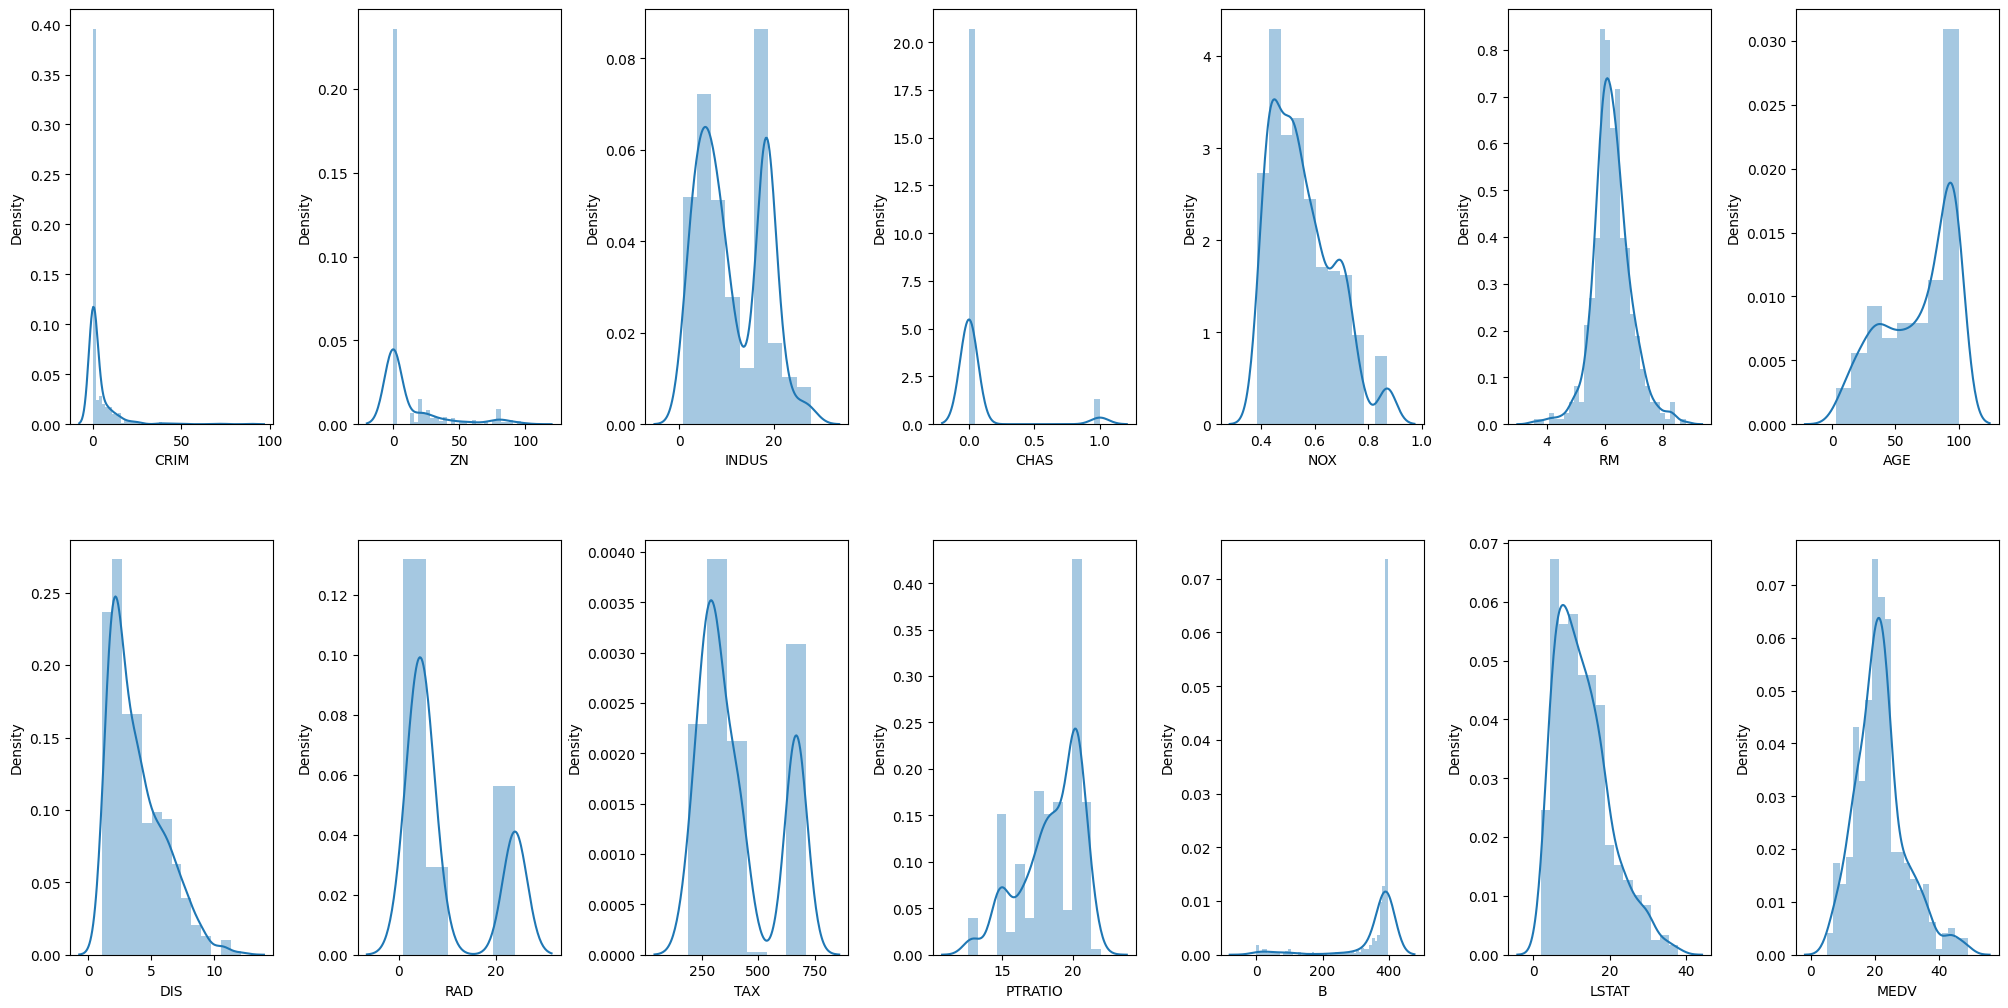

In [11]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(ncols=7, nrows=2, figsize= (20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
  sns.distplot(v, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

<Axes: >

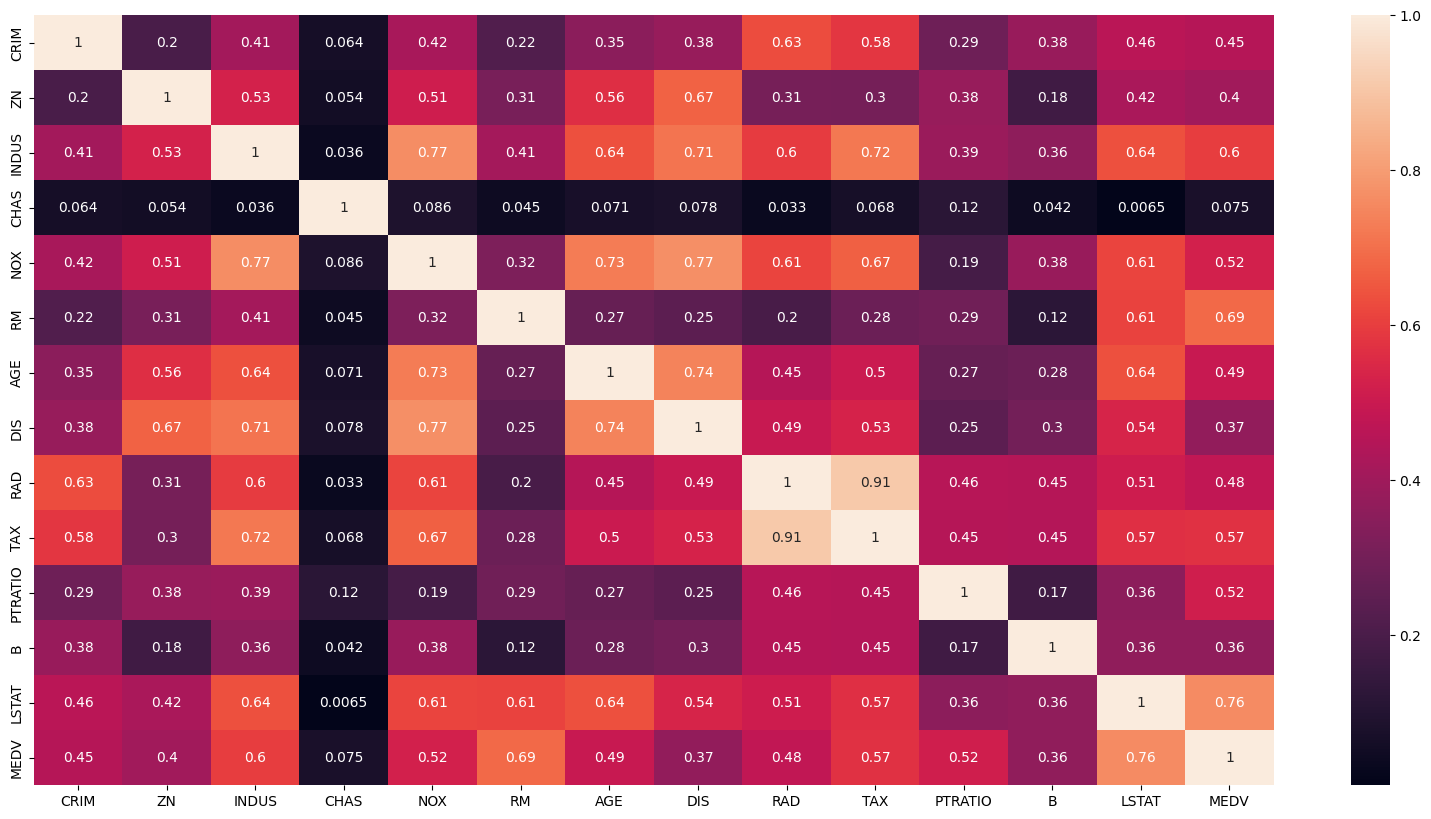

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot= True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

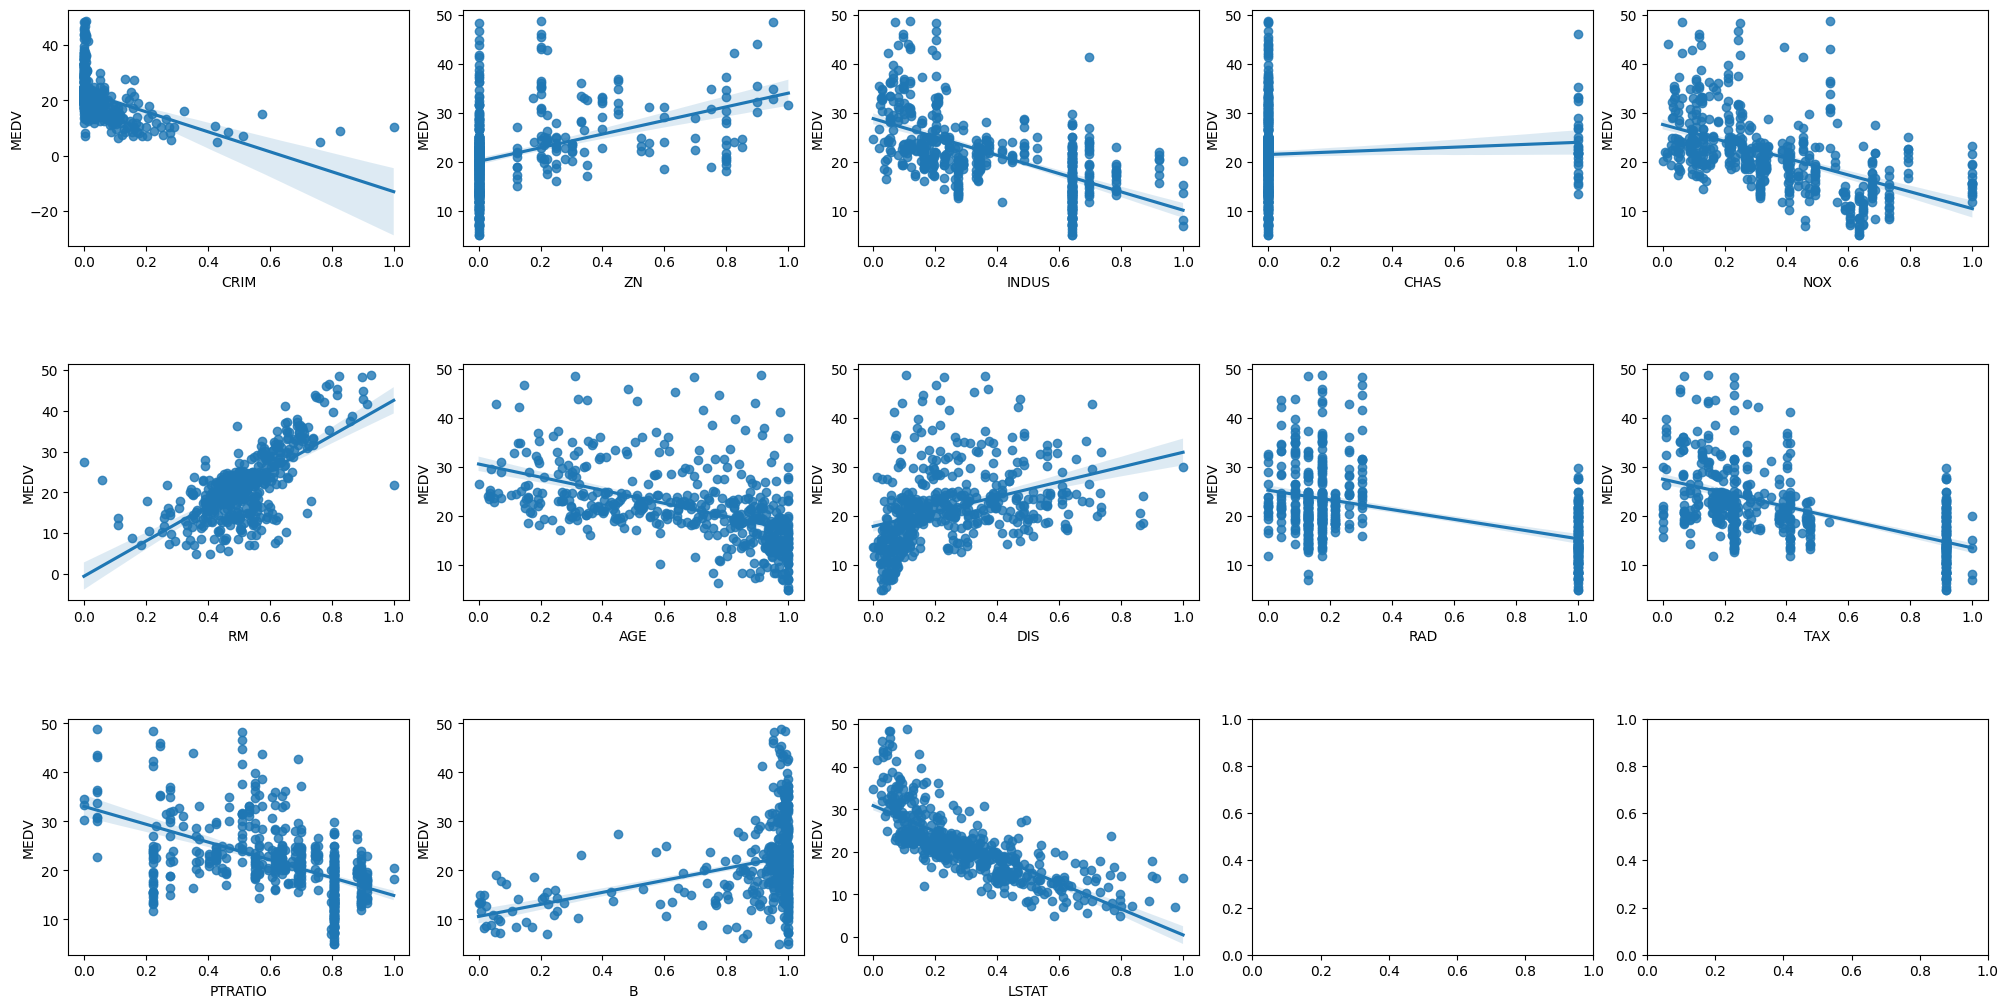

In [13]:
# Let's scale the columns before plotting them aginst MEDV
min_max_scalar = preprocessing.MinMaxScaler()
column_sels = list(data.columns[0:13])
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data = min_max_scalar.fit_transform(x), columns = column_sels)
fig, axs = plt.subplots(ncols=5, nrows= 3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,k in enumerate(column_sels):
  sns.regplot(y= y, x = x[k], ax = axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

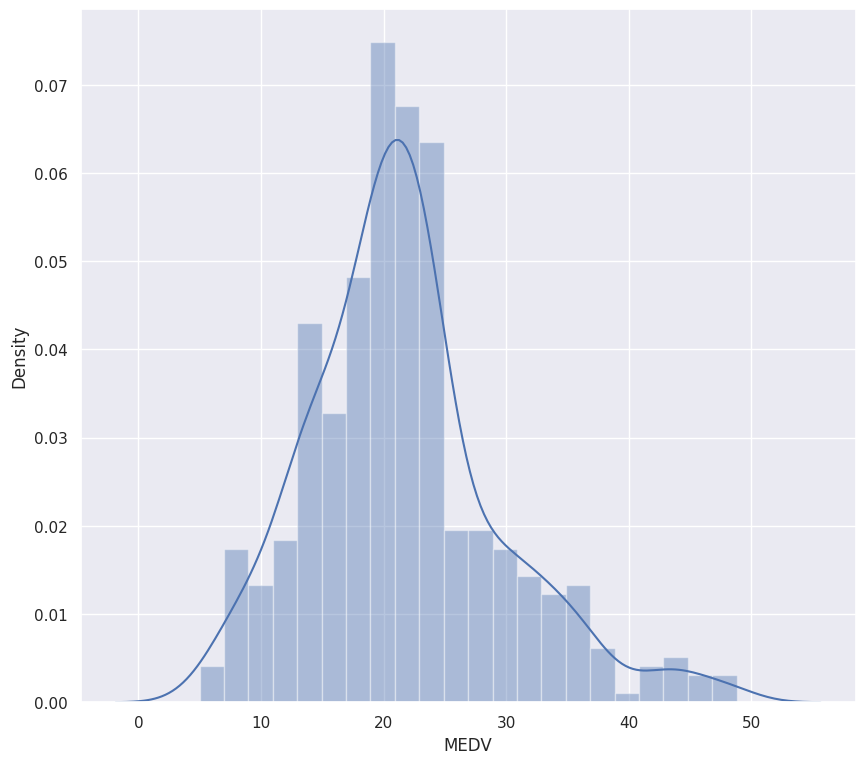

In [28]:
# Histogram plotting the distribution of the target variable MEDV
sns.set(rc ={'figure.figsize':(10, 9)})
sns.distplot(data['MEDV'], hist =True)
plt.show()

We can see that the values of MEDV are distributed normally with a few outliers. There is a large upper-limit bin around $50,000 which fits with the suggestion that median house values in the dataset were capped at 50k.

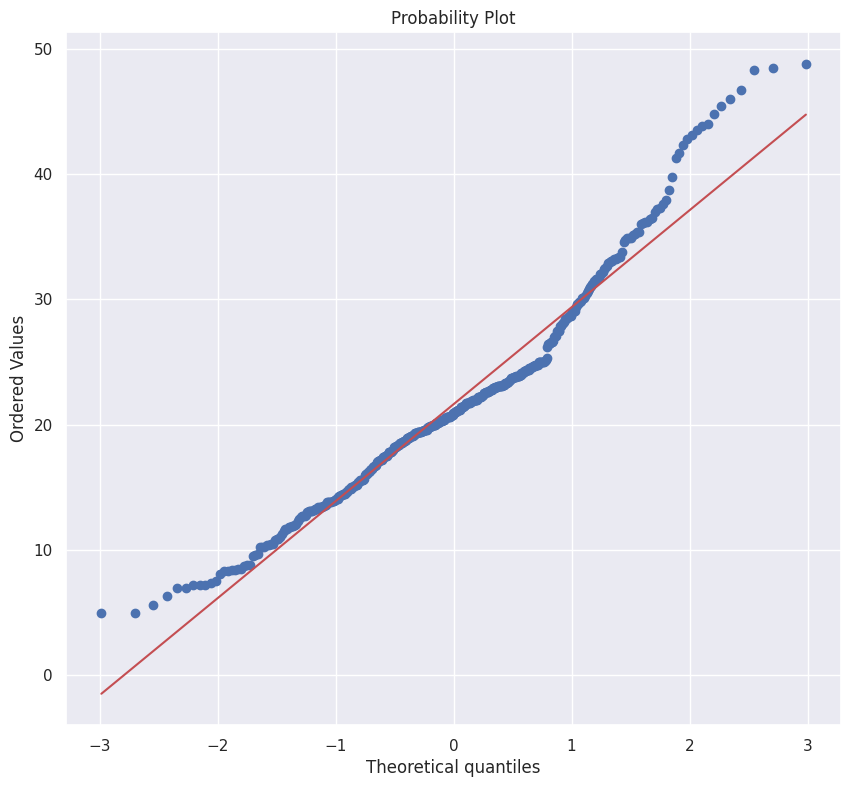

In [29]:
# Normal probability plot
# Data distribution should closely follow the diagonal that represents the normal distribution.
res = stats.probplot(data['MEDV'], plot= plt)


## Scatterplot matrix
Scatterplot matrix to visualise the pair-wise relationships and correlations between the selected features. It is also quite useful to give a quick overview of how the data is distributed and whether it cointains outliers.

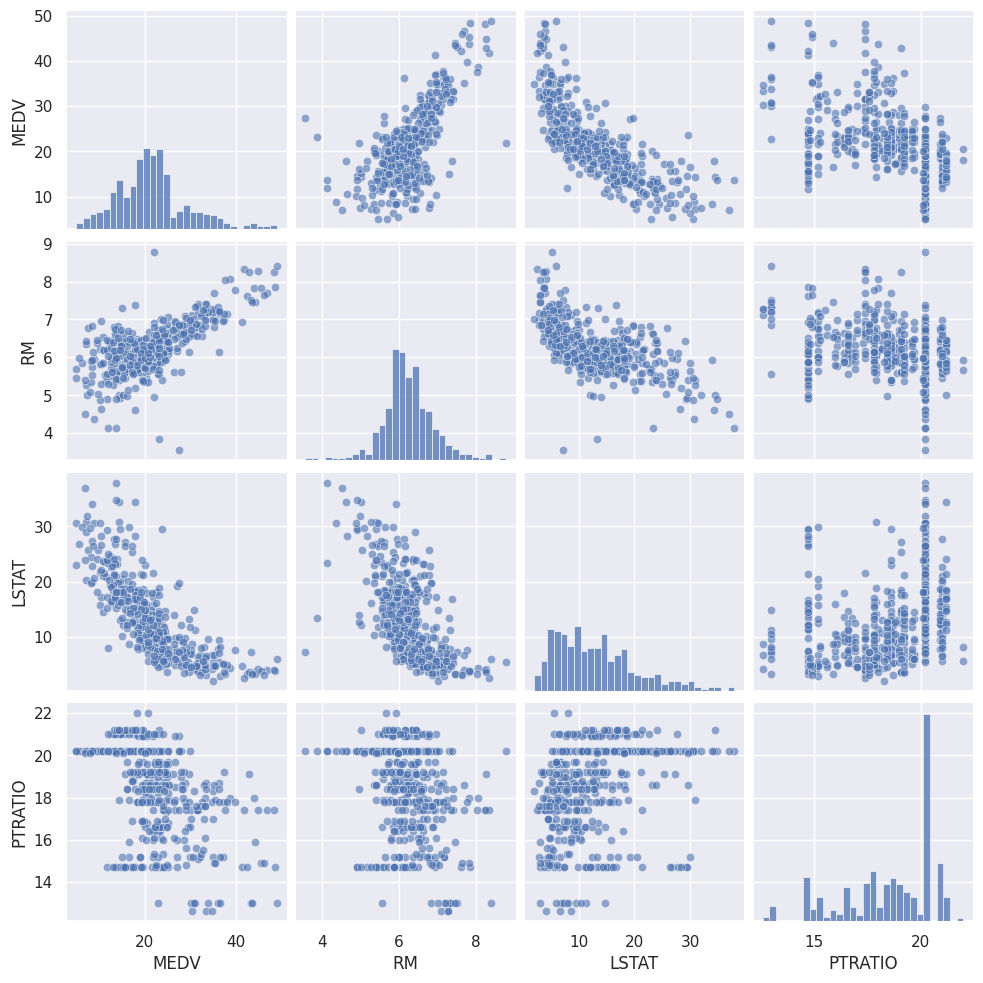

In [33]:
sns.pairplot(data[['MEDV', 'RM', 'LSTAT', 'PTRATIO']],
                  plot_kws = {'alpha': 0.6},
                   diag_kws={'bins': 30})
plt.show()

Some observations:

Note how the number of rooms per house (RM), the % of the population that is lower class (LSTAT) and pupil-teacher ratio by town (PTRATIO) are highly correlated with the median house value (MDEV).

RM and MEDV have the closest shape to normal distributions.

Price increases with RM and decreases with an increase in PTRATIO and LSTAT.

## Scatterplots along with the line of best fit linear models
The line of best fit is calculated by minimising the ordinary least squares error function, something Seaborn does automatically when we call the regplot function. Also note the shaded areas around the lines, which represent 95% confidence intervals.

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

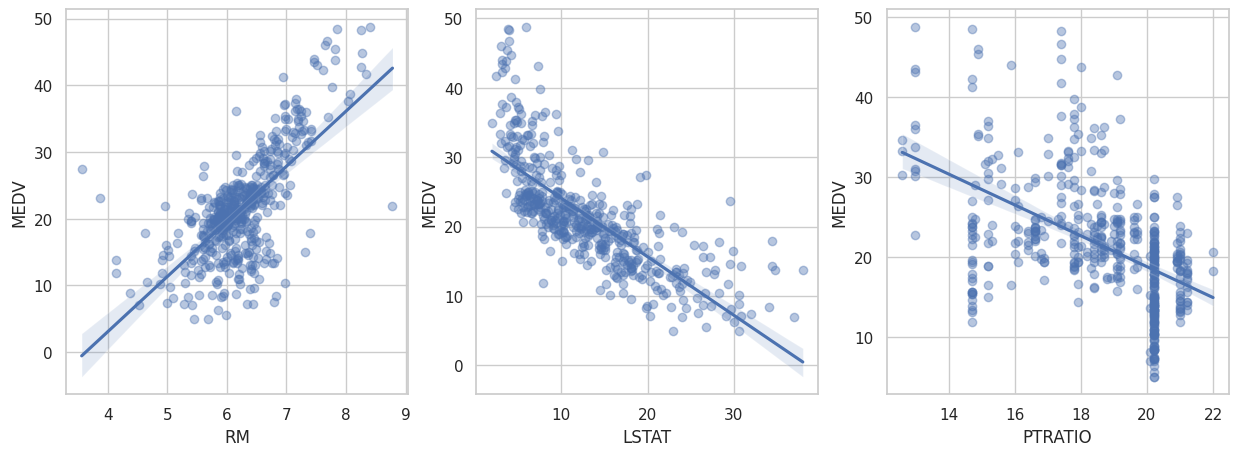

In [37]:
sns.set_style("whitegrid")          # Set the visual theme of the plots to have white background with grid lines

# Create a single row of 3 subplots (side-by-side); figsize makes the plots wider and more readable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

scatter_kws = {'alpha': 0.4}        # Define transparency for scatterplot points to improve visibility

# Plot regression between 'RM' (average number of rooms) and 'MEDV' (median value of homes)
sns.regplot(x='RM', y='MEDV', data=data, ax=ax[0], scatter_kws=scatter_kws)

# Plot regression between 'LSTAT' (percentage of lower status population) and 'MEDV'
sns.regplot(x='LSTAT', y='MEDV', data=data, ax=ax[1], scatter_kws=scatter_kws)

# Plot regression between 'PTRATIO' (pupil-teacher ratio) and 'MEDV'
sns.regplot(x='PTRATIO', y='MEDV', data=data, ax=ax[2], scatter_kws=scatter_kws)


#### Boxplots showing the distribution of the data

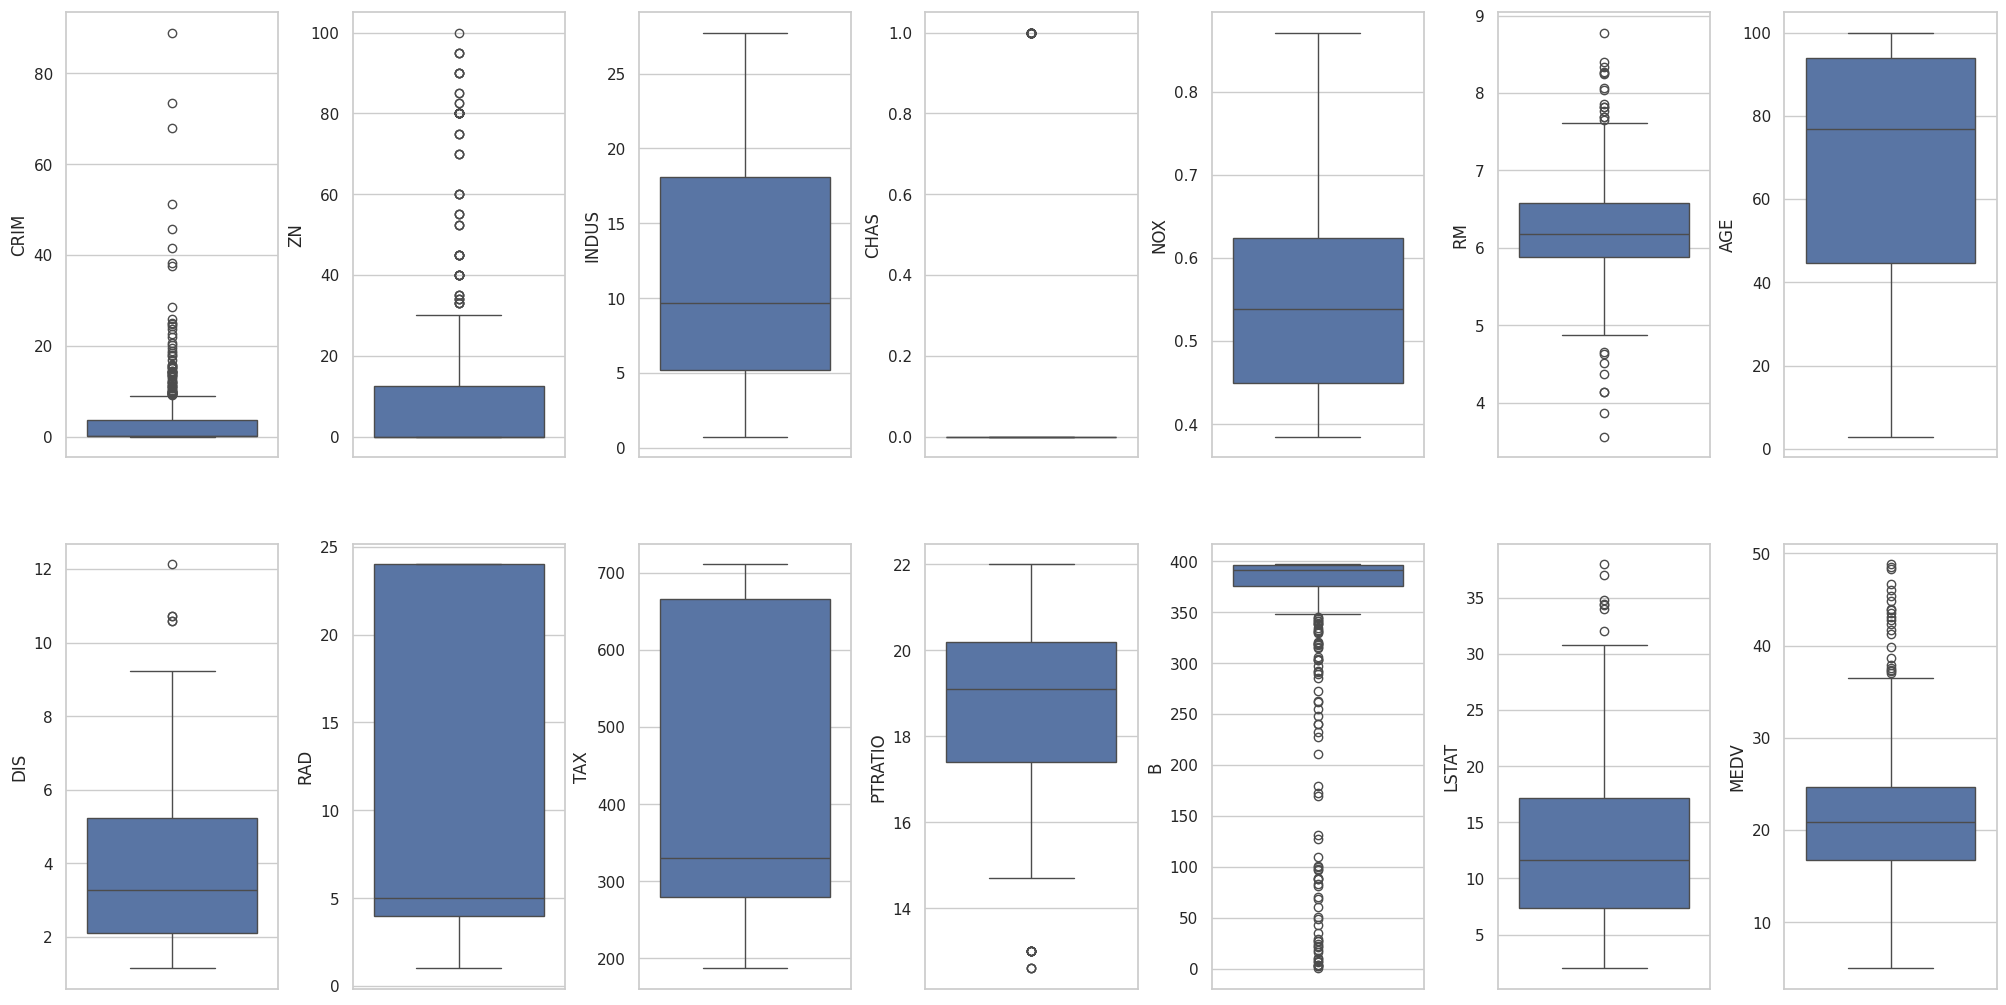

In [40]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols= 7, nrows=2, figsize=(20, 10))
indes = 0
axs = axs.flatten()
for k,v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state= 25)


In [18]:
print('Shape of x_train', x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_train', y_test.shape)

Shape of x_train (343, 13)
Shape of x_test (147, 13)
Shape of y_train (343,)
Shape of y_train (147,)


# Regression Models
### Linear Regression

In [23]:
reg_linear = LinearRegression()
reg_linear.fit(x_train, y_train)

LinearRegression()

In [24]:
# Predicting Cross Validation Score the Train set results
cv_linear = cross_val_score(estimator= reg_linear, X= x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = reg_linear.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = reg_linear.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print("R2_score (train): ", r2_score_linear_train)
print("R2_score (test): ", r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7538284411107643
R2_score (train):  0.795012895191201
R2_score (test):  0.6993574897561895
RMSE:  3.65622796380632


### Polynomial Regression - 2nd degree